# Population loss in the immediate aftermath of a nuclear attack

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../src")
from main import Country, run_many_countries
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("https://raw.githubusercontent.com/allfed/ALLFED-matplotlib-style-sheet/main/ALLFED.mplstyle")

## (1) Single country
Use this to simulate an attack on a single country and visualize the results on an interactive map. For this demo we use the same targeting policy as Toon et al.

In [2]:
# country that is attacked
country_name = "Germany" 

# nuclear arsenal with which the country is attacked (number of warheads and yield in kt)
arsenal = 200*[100] 

In [3]:
country = Country(country_name, landscan_year=2022, degrade=True, degrade_factor=3)

# sanity check - this corresponds to the population of the selected country
country.data.sum()

In [ ]:
country.attack_max_fatality(arsenal, include_injuries=False, non_overlapping=True)

51.11486642900134 6.812657700409744 51.073432 6.841337 5.023793028921032 5.2414374618673705
51.11486642900134 6.820991226648772 51.073432 6.841337 4.821411798146027 5.2414374618673705
51.11486642900134 6.8293247528878 51.073432 6.841337 4.683045162387419 5.2414374618673705
51.11486642900134 6.837658279126828 51.073432 6.841337 4.614455245341355 5.2414374618673705
51.11486642900134 6.845991805365884 51.073432 6.841337 4.6187517134358895 5.2414374618673705
51.11486642900134 6.854325331604912 51.073432 6.841337 4.695734503757382 5.2414374618673705
51.11486642900134 6.86265885784394 51.073432 6.841337 4.841937899261333 5.2414374618673705
51.11486642900134 6.870992384082967 51.073432 6.841337 5.0513550304923385 5.2414374618673705
51.10653270984768 6.79599064793166 51.073432 6.841337 4.855643696425557 5.2414374618673705
51.10653270984768 6.804324174170716 51.073432 6.841337 4.497712496065638 5.2414374618673705
51.10653270984768 6.812657700409744 51.073432 6.841337 4.19035400713994 5.24143746

KeyboardInterrupt: 

In [ ]:
# This is the total number of fatalities
country.get_total_fatalities()

18189246

In [ ]:
# This is the fraction of the country's total industrial area that is burned down
country.get_total_destroyed_industrial_area()

0.22981212769233786

In [ ]:
# This is to check if some locations of interest (in ../data/custom-locations) are destroyed
country.get_number_destroyed_custom_locations()

'4 custom locations destroyed out of 8 (50.0% ± 17.7%)'

In [ ]:
country.custom_locations

,name,latitude,longitude,status
0,YARA Brunsbüttel GmbH,53.910816,9.208998,intact
1,YARA GmbH & Co. KG,54.134532,12.300922,intact
2,Wittenberg,51.876023,12.585725,intact
3,Unterbreizbach,50.839966,9.979606,intact
4,Dormagen,51.073432,6.841337,destroyed
5,Frankfurt,50.089278,8.523698,destroyed
6,Chemiepark Knapsack,50.860153,6.870302,destroyed
7,Industriepark Höchst,50.092835,8.531066,destroyed



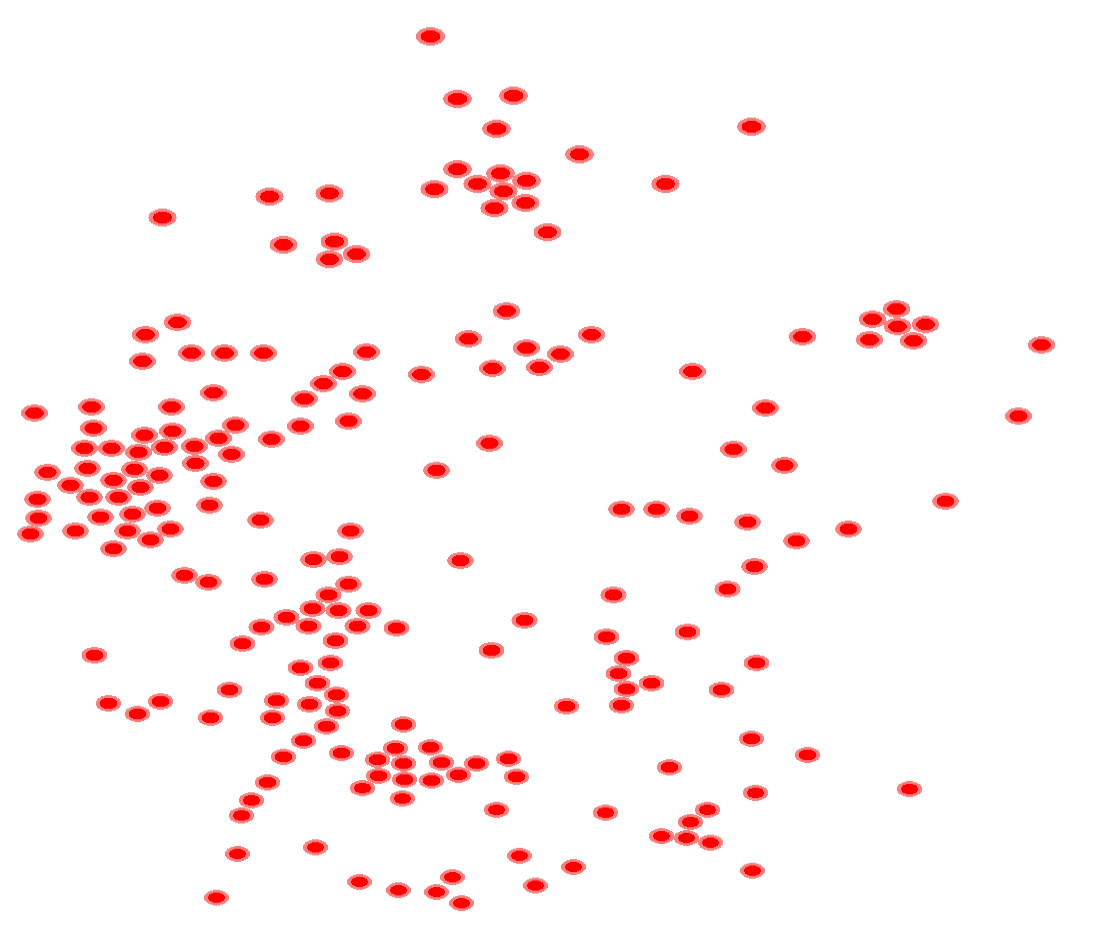

In [ ]:
m = country.plot(show_hit_regions=True, show_industrial_areas=False, show_custom_locations=True)
m

## (2) Multiple countries
Once you're confident that everything works for a single country, you can also run the model for multiple countries.

In [ ]:
# This is the SORT scenario of Toon et al. 2008
scenario = {
    # "France": 200 * [100],
    # "United Kingdom": 200 * [100],
    "Germany": 200 * [100],
    # "India": 200 * [100],
    # "Pakistan": 200 * [100],
    # "Japan": 200 * [100],
    # "United States of America": 1000 * [100],
    # "China": 1100 * [100],
    # "Russia": 1100 * [100],
}

In [ ]:
run_many_countries(scenario, degrade=False, degrade_factor=3, targeting_policy="max_fatality_non_overlapping")

Let's plot the results

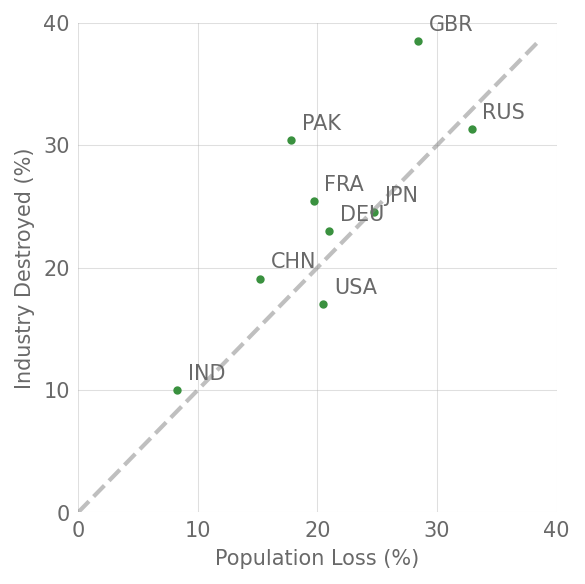

In [19]:
# Read the CSV file
df = pd.read_csv('../results/Toon2008_SORT.csv')

# Create a square plot
fig, ax = plt.subplots(figsize=(4, 4))

# Create the scatter plot
scatter = ax.scatter(df['population_loss_pct'], df['industry_destroyed_pct'])

# Add labels for each point
for i, txt in enumerate(df['iso3']):
    ax.annotate(txt, (df['population_loss_pct'][i], df['industry_destroyed_pct'][i]), 
                xytext=(5, 5), textcoords='offset points')

# Add labels and title
ax.set_xlabel('Population Loss (%)')
ax.set_ylabel('Industry Destroyed (%)')

# Add a diagonal line
ax.plot([0, max_value], [0, max_value], '--', alpha=0.5, color="grey")
plt.xlim(0, 40)
plt.ylim(0, 40)

# gridline only every 10
ax.set_xticks(np.arange(0, 50, 10))
ax.set_yticks(np.arange(0, 50, 10))

# Display the plot
plt.tight_layout()
plt.show()


## (3) Impact of multiple hits with finite accuracy
Here's a more advanced use case. We want to know what's the difference in terms of fatalities if we target many weapons at the same spot (but with some uncertainty) vs using the same weapons to target different locations in the same city. For this we use higher-resolution data. We use NYC as an example.

In [ ]:
region = Country(
    country_name="United States of America",
    landscan_year=2021,
    degrade=False,
    use_HD=True,
    subregion=[-74.259090, -73.251740, 40.477399, 41.024100]
)
region_clean = copy.deepcopy(region)

In [ ]:
number_of_weapons = 1
yield_of_weapons = 15
CEP = 1000

**Case 1**: different targets, non-overlapping

In [ ]:
region = copy.deepcopy(region_clean)
region.attack_max_fatality(arsenal=number_of_weapons*[yield_of_weapons], include_injuries=False, non_overlapping=True)
print(region.get_total_fatalities())
print(region.target_list)
# m = region.plot(show_hit_regions=True)
# m

**Case 2**: different targets, overlapping allowed

In [ ]:
region = copy.deepcopy(region_clean)
region.attack_max_fatality(arsenal=number_of_weapons*[yield_of_weapons], include_injuries=False, non_overlapping=False)
print(region.get_total_fatalities())
# m = region.plot(show_hit_regions=True)
# m

**Case 3**: all weapons targeted at the same high-value target

In [ ]:
fatalities_list = []
for _ in range(10):
    region = copy.deepcopy(region_clean)
    for i in range(number_of_weapons):
        region.attack_specific_target(
            lat=40.74721112908017,
            lon=-73.98510350648793,
            yield_kt=yield_of_weapons,
            CEP=CEP,
        )
    fatalities_list.append(region.get_total_fatalities())

mean_fatalities = sum(fatalities_list) / len(fatalities_list)
confidence_interval = np.percentile(fatalities_list, [5, 95])
print("Mean Fatalities:", mean_fatalities)
print("90% Confidence Interval of Fatalities:", confidence_interval)
# m = region.plot(show_hit_regions=True)
# m


Fatalities in millions
| Weapons  | Max fatality (overlap forbidden) | Max fatality (overlap allowed) | Max value target (CEP = 200m) | Max value target (CEP = 1000m) |
|----------|----------|----------|----------|----------|
| 1 x 100kt| 2.37 | 2.37 | 2.36-2.37 | 2.11-2.36 |
| 2 x 100kt| 2.97 | 3.20 | 2.93-2.94 | 2.88-2.99 |
| 3 x 100kt| 3.54 | 3.89 | 3.22-3.26 | 3.18-3.34 |
| 4 x 100kt| 3.99 | 4.51 | 3.42-3.44 |3.39-3.55 |
| 1 x 15kt | 1.13 | 1.13 | 0.99-1.08 | 0.68-1.04 |
| 2 x 15kt | 1.46 | 1.60 | 1.37-1.42 | 0.90-1.34 |
| 3 x 15kt | 1.67 | 1.92 | 1.55-1.58| 1.29-1.66 |
| 4 x 15kt | 1.84  | 2.19 | 1.65-1.68  | 1.53-1.83 |
